In [8]:
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [38]:
data = []
with open(os.path.join('data', 'train.json'), 'r') as train_file:
    for row in train_file:
        data.append(json.loads(row))

In [42]:
data_df = pd.DataFrame(data)
data_df

,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image
0,4.0,"08 24, 2010",u04428712,"So is Katy Perry's new album ""Teenage Dream"" c...",Amazing that I Actually Bought This...More Ama...,1282608000,Pop,$35.93,p70761125,85559980,NaN
1,5.0,"10 31, 2009",u06946603,"I got this CD almost 10 years ago, and given t...",Excellent album,1256947200,Alternative Rock,$11.28,p85427891,41699565,NaN
2,4.0,"10 13, 2015",u92735614,I REALLY enjoy this pairing of Anderson and Po...,"Love the Music, Hate the Light Show",1444694400,Pop,$89.86,p82172532,24751194,NaN
3,5.0,"06 28, 2017",u35112935,Finally got it . It was everything thought it ...,Great,1498608000,Pop,$11.89,p15255251,22820631,NaN
4,4.0,"10 12, 2015",u07141505,"Look at all star cast. Outstanding record, pl...",Love these guys.,1444608000,Jazz,$15.24,p82618188,53377470,NaN
...,...,...,...,...,...,...,...,...,...,...,...
199995,4.0,"05 1, 2004",u68902609,"With this, Mariah's third album, Mariah proved...",Well Done Mariah! You Show 'Em!,1083369600,Pop,$7.98,p84118731,35077372,NaN
199996,5.0,"02 27, 2017",u15269603,Fantastic CD. All the hits are here and even ...,"Great collection, excellent sound!",1488153600,Pop,$11.49,p08613950,09788722,NaN
199997,3.0,"03 1, 2011",u25124021,"This recording is rather disappointing, to a c...",Odd Couplings,1298937600,Classical,$13.57,p25341819,71627957,NaN
199998,5.0,"03 20, 2016",u04485604,Get it now ! Right now ! I am partial. I am a ...,Our Poet,1458432000,Alternative Rock,$11.07,p19134748,27463540,NaN


In [43]:
from datetime import datetime

data_df['reviewMonth'] = data_df['reviewTime'].apply(lambda x: x.split(' ')[0])
data_df['reviewYear'] = data_df['reviewTime'].apply(lambda x: x.split(' ')[2])
data_df['reviewHour'] = data_df['unixReviewTime'].apply(lambda x: datetime.fromtimestamp(x).hour)
data_df['reviewMonthYear'] = data_df['reviewYear'] + '-' + data_df['reviewMonth']

In [48]:
analysis_df = data_df.sort_values(by=['reviewYear', 'reviewMonth'])
analysis_df

,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image,reviewMonth,reviewYear,reviewHour,reviewMonthYear
65431,5.0,"12 17, 1997",u06529076,The queen of the British musical comedy stage ...,The definitive anthology of her work to date.,882316800,Pop,$13.15,p05853186,11975733,NaN,12,1997,19,1997-12
3692,5.0,"02 19, 1998",u63719191,The epic saga that has become known as the Wu ...,The Wu Tang Clan -- headbang boogie Shaolin r...,887846400,Jazz,$16.76,p71198529,24599001,NaN,02,1998,19,1998-02
121465,4.0,"03 26, 1998",u63719191,"Impresario, Sean ""Puffy"" Combs and his label B...",Raps Ted Turner on a hiphop world domination q...,890870400,Dance & Electronic,$7.00,p80567592,07524381,NaN,03,1998,19,1998-03
41298,5.0,"04 28, 1998",u46676393,When I first played this cd my eyes really pop...,GREAT songwriters and performers!!,893721600,Pop,$8.96,p67539568,50220370,NaN,04,1998,20,1998-04
57643,5.0,"04 28, 1998",u46676393,This is the BEST cd ever recorded\nby the crea...,EXCELLENT!!,893721600,Alternative Rock,$6.95,p54744220,19499499,NaN,04,1998,20,1998-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185879,5.0,"09 14, 2018",u41105471,Great effort by this trio. The musicianship he...,...maybe their best work to date.,1536883200,Pop,$7.49,p53799349,62983450,NaN,09,2018,20,2018-09
192370,5.0,"09 27, 2018",u12454699,Excellent album,Excellent album,1538006400,Pop,$30.13,p59897760,85329168,NaN,09,2018,20,2018-09
193796,5.0,"09 10, 2018",u55383346,Great cd!,Gospel Music!,1536537600,Pop,$9.34,p06577805,04267269,NaN,09,2018,20,2018-09
199701,5.0,"09 1, 2018",u66930454,First 5 releases are the best records.,Best Recordings by Molly Hatchet,1535760000,Pop,$19.74,p72730445,55290008,NaN,09,2018,20,2018-09


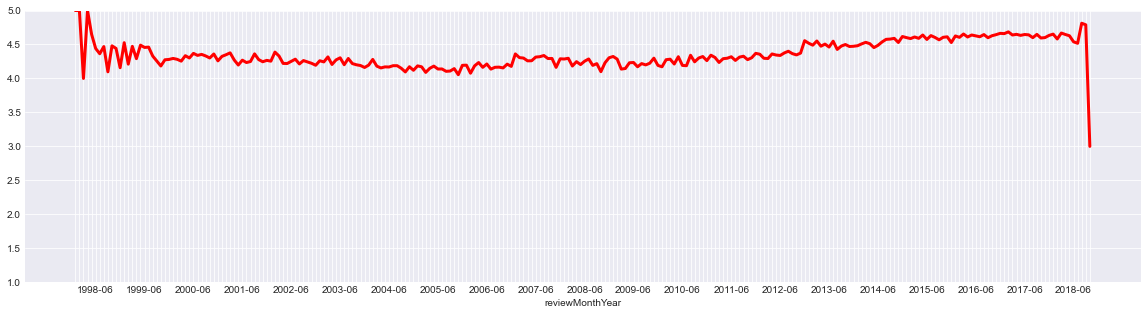

In [62]:
grouped_date = analysis_df.groupby(analysis_df['reviewMonthYear'])['overall'].mean()
tick_labels = [x if x[-2:] == '06' else '' for x in grouped_date.index]

plt.figure(figsize=(20,5))
grouped_date.plot(color='red', linewidth=3)
plt.xticks(range(len(tick_labels)), tick_labels)
plt.ylim(1, 5)
plt.show()

In [65]:
len(grouped_date)

250

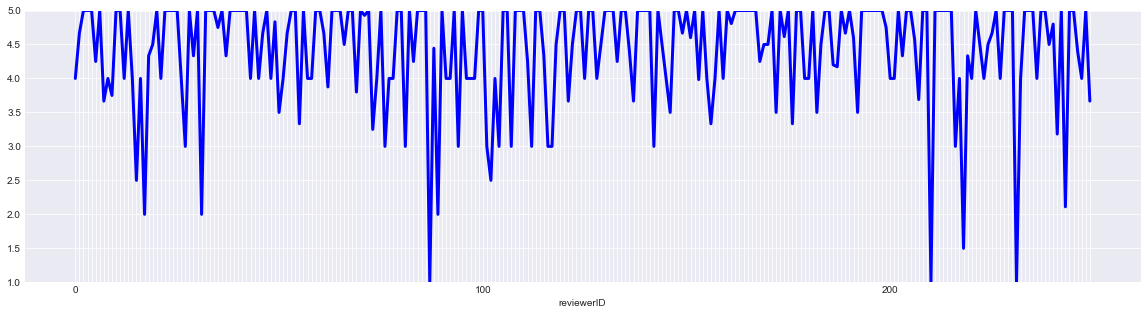

In [66]:
grouped_user = analysis_df.groupby(analysis_df['reviewerID'])['overall'].mean()
np.random.shuffle(grouped_user)
grouped_user = grouped_user[0:250]
tick_labels = [str(i) if i % 100 == 0 else '' for i in range(len(grouped_user.index))]

plt.figure(figsize=(20, 5))
grouped_user.plot(color='blue', linewidth=3)
plt.xticks(range(len(tick_labels)), tick_labels)
plt.ylim(1, 5)
plt.show()

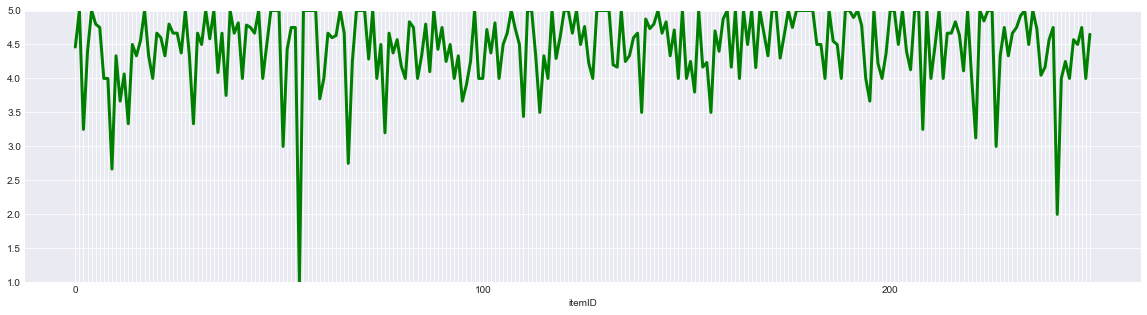

In [68]:
grouped_item = analysis_df.groupby(analysis_df['itemID'])['overall'].mean()
np.random.shuffle(grouped_item)
grouped_item = grouped_item[0:250]
tick_labels = [str(i) if i % 100 == 0 else '' for i in range(len(grouped_item.index))]

plt.figure(figsize=(20, 5))
grouped_item.plot(color='green', linewidth=3)
plt.xticks(range(len(tick_labels)), tick_labels)
plt.ylim(1, 5)
plt.show()

<bound method Series.unique of 65431     $13.15
3692      $16.76
121465     $7.00
41298      $8.96
57643      $6.95
           ...  
185879     $7.49
192370    $30.13
193796     $9.34
199701    $19.74
41240     $11.99
Name: price, Length: 200000, dtype: object>